### 1. 데이터 준비하기

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

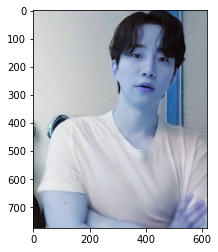

In [2]:
my_image_path = './camera_sticker/images/jun1.jpg'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()

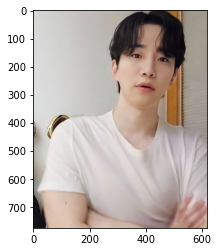

In [3]:
#보정처리
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

### 2. 얼굴 검출 및 랜드마크 검출

In [4]:
detector_hog = dlib.get_frontal_face_detector()

dlib_rects = detector_hog(img_rgb, 1)

In [5]:
print(dlib_rects)

rectangles[[(291, 118) (513, 341)]]


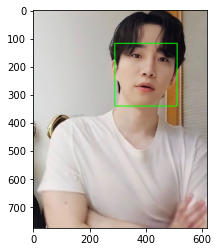

In [6]:
#얼굴 검출해보기
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t),(r,b),(0,255,0),2,lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [7]:
#얼굴 landmark 검출하기
#모델 호출
model_path = './camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [8]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


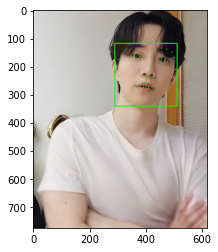

In [9]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0,255,0), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 3. 스티커 적용위치 확인하기

In [10]:
#좌표 확인해보기
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[33])
    x = landmark[33][0]
    y = landmark[33][1] #- dlib_rect.height()//2
    w = h = dlib_rect.width()
    print('(x, y) : (%d, %d)'%(x,y))
    print('(w, h) : (%d, %d)'%(w,h))

(408, 241)
(x, y) : (408, 241)
(w, h) : (223, 223)


(223, 223, 3)


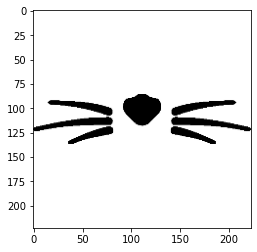

In [11]:
#준비한 스티커 가져와 확인하기
sticker_path = './camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_COLOR) #투명한 배경 고려
img_sticker = cv2.resize(img_sticker, (w,h))
print(img_sticker.shape)
plt.imshow(img_sticker)
plt.show()

In [12]:
#스티커 추가 위해 시작(x,y)좌표 조정
refined_x = x - w//2
refined_y = y - h//2
print('(x, y) : (%d, %d)'%(refined_x, refined_y))

(x, y) : (297, 130)


In [13]:
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0
    
print('(x, y) : (%d, %d)'%(refined_x, refined_y))

(x, y) : (297, 130)


### 4. 스티커 적용하기

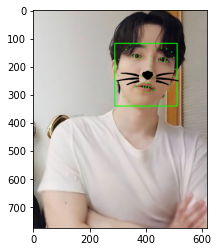

In [14]:
# (1) np.where로 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
np.where(img_sticker ==0, img_sticker, sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

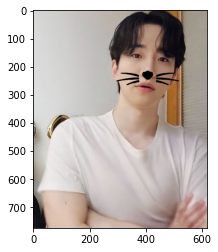

In [15]:
# (2) 스티커 뒤로 원본이미지 같이 보이게 만들기
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
np.where(img_sticker==0, img_sticker, sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

In [39]:
'''
#cv2.addWeighted()
alpha = 0.25

img1 = cv2.imread(my_image_path)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread(sticker_path)
img2 = cv2.resize(img2, (223, 223))

dst = cv2.addWeighted(img1, alpha, img2, (1-alpha), 0)
cv2.imshow('dst',dst)
cv2.waitKey(0)
dv2.destroyAllWindows()
'''

"\n#cv2.addWeighted()\nalpha = 0.25\n\nimg1 = cv2.imread(my_image_path)\nimg1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)\n\nimg2 = cv2.imread(sticker_path)\nimg2 = cv2.resize(img2, (223, 223))\n\ndst = cv2.addWeighted(img1, alpha, img2, (1-alpha), 0)\ncv2.imshow('dst',dst)\ncv2.waitKey(0)\ndv2.destroyAllWindows()\n"

### 다른 각도의 사진 적용해보기

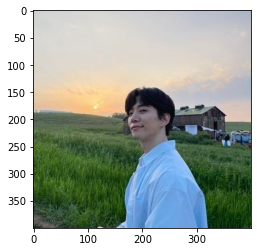

In [17]:
#1. 데이터준비
my_image_path2 = './camera_sticker/images/jun2.jpg'
img_bgr2 = cv2.imread(my_image_path2)
img_show2 = img_bgr2.copy()

img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb2)
plt.show()

rectangles[[(163, 163) (225, 225)]]


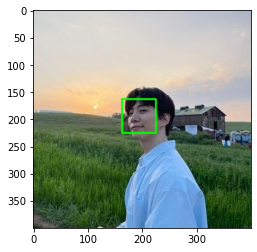

In [18]:
#2. 얼굴 및 랜드마크 검출
detector_hog2 = dlib.get_frontal_face_detector()

dlib_rects2 = detector_hog(img_rgb2, 1)

print(dlib_rects2)

for dlib_rect in dlib_rects2:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show2, (l,t),(r,b),(0,255,0),2,lineType=cv2.LINE_AA)
    
img_show_rgb2 = cv2.cvtColor(img_show2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()

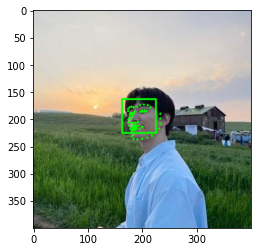

In [19]:
landmark_predictor2 = dlib.shape_predictor(model_path)

list_landmarks2 = []

for dlib_rect in dlib_rects2:
    points = landmark_predictor2(img_rgb2, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks2.append(list_points)
    
for landmark in list_landmarks2:
    for point in landmark:
        cv2.circle(img_show2, point, 2, (0, 255, 0), -1)
        
img_show_rgb2 = cv2.cvtColor(img_show2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()

In [25]:
#3.스티커 가져오기
# 좌표 확인하기
for dlib_rect, landmark in zip(dlib_rects2, list_landmarks2):
    print(landmark[33])
    x = landmark[33][0]
    y = landmark[33][1] #- dlib_rect.height()//2
    w = h = dlib_rect.width()
    print('(x, y) : (%d, %d)'%(x,y))
    print('(w, h) : (%d, %d)'%(w,h))

(185, 207)
(x, y) : (185, 207)
(w, h) : (63, 63)


(63, 63, 3)


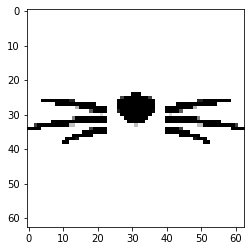

In [26]:
#준비한 스티커 가져와 확인하기
sticker_path = './camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_COLOR) #투명한 배경 고려
img_sticker = cv2.resize(img_sticker, (w,h))
print(img_sticker.shape)
plt.imshow(img_sticker)
plt.show()

In [27]:
#스티커 추가 위해 시작(x,y)좌표 조정
refined_x = x - w//2
refined_y = y - h//2
print('(x, y) : (%d, %d)'%(refined_x, refined_y))

(x, y) : (154, 176)


In [28]:
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0
    
print('(x, y) : (%d, %d)'%(refined_x, refined_y))

(x, y) : (154, 176)


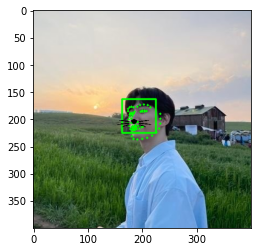

In [30]:
# 4. 스티커 붙이기
# (1) np.where로 스티커 적용
sticker_area = img_show2[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show2[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
np.where(img_sticker ==0, img_sticker, sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show2, cv2.COLOR_BGR2RGB))
plt.show()

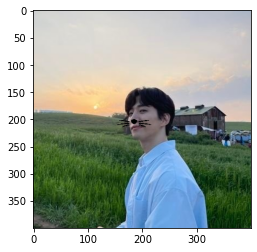

In [32]:
# (2) 스티커 뒤로 원본이미지 같이 보이게 만들기
sticker_area = img_bgr2[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr2[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
np.where(img_sticker==0, img_sticker, sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB))
plt.show()

누워있는 사진, 어두운 사진은 시도를 안 해봤지만,
각도가 조금 틀어졌다고 해서, 조금 멀리 있다고 해서 얼굴 랜드마크를 검출 못하는 것은 아니었다. 극단적인 예를 시도해봐야겠다.<br>
다만 얼굴이 조금 틀어져 있을 때, 수염도 같이 틀어지면 좋았을텐데 가져온 이미지 그대로 합성이 된다. 아마 사진의 각도를 맞춰서 틀어야 할 것 같은데, 이 이유때문에 누워있는 사진에서 수염이 알맞게 합성이 안된다는 걸까.<br>
중간에 addWeighted를 이용해서 투명도를 조절해보라고 해서 시도를 하려 했으나,, 얼굴사진에 맞게 바뀐 수염의 크기를 어떻게 조절해서 이미지끼리 합성해야 할 지 모르겠다. 이건 계속 시도를 해봐야 할 듯. 